# Лабораторная работа №2,3. Исследование факторов и организация работы с таблицами данных

*Набор данных*: data_purch.xlsx

### Загрузка пакетов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Загрузка и проверка данных

In [3]:
data = pd.read_excel('data_purch.xlsx')

In [4]:
# вывод данных
data

,first_pub_date,final_protocol_pub_date,purchase_number,collecting_start_date,collecting_end_date,placing_base_name,cust_reg,lot_price_correct,drug_mnn_ext_code,drug_mnn_name,...,drug_position_price,ftg,is_abnd,is_znvlp,is_narcotic,is_msp_purchase,is_povt,is_dif,app_amount_absolute_correct,advance_sum_correct
0,2021-03-30,2021-04-12,AA0000001,2021-03-30,2021-04-07,Электронный аукцион,Республика Адыгея,56040.00,5d6d137c-75b7-11ea-b5ac-1b70cb6e9621,ИНТЕРФЕРОН АЛЬФА-2B,...,56040.00,Иммуномодуляторы,0,1,0,0,0,0,0.0,0.0
1,2021-03-30,2021-04-12,AB0000002,2021-03-30,2021-04-07,Электронный аукцион,Республика Адыгея,57720.00,5d6e26f4-75b7-11ea-b5ac-3b4e2912a2c3,ИНТЕРФЕРОН АЛЬФА-2B,...,57720.00,Иммуномодуляторы,0,1,0,0,0,0,0.0,0.0
2,2021-05-24,2021-06-08,AD0000003,2021-05-24,2021-06-01,Электронный аукцион,Республика Адыгея,931426.86,1edb1f40-bf5b-11e9-bd5d-c33c05f32457,БУДЕСОНИД,...,33096.00,Препараты для лечения обструктивных заболевани...,0,1,0,0,0,0,0.0,0.0
3,2021-05-24,2021-06-08,AD0000003,2021-05-24,2021-06-01,Электронный аукцион,Республика Адыгея,931426.86,1edb3a20-bf5b-11e9-bd5d-07a90f4fd9f6,БУДЕСОНИД+ФОРМОТЕРОЛ,...,225828.00,Препараты для лечения обструктивных заболевани...,0,1,0,0,0,0,0.0,0.0
4,2021-05-24,2021-06-08,AD0000003,2021-05-24,2021-06-01,Электронный аукцион,Республика Адыгея,931426.86,1edb168a-bf5b-11e9-bd5d-5725ca76550a,МОКСОНИДИН,...,10123.68,Препараты гипотензивные,0,1,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556307,2021-07-27,2021-08-06,AB0166842,2021-07-27,2021-08-04,Электронный аукцион,Город Байконур,221775.00,1ed99ddc-bf5b-11e9-bd5d-d70987c26fdc,ЖЕЛЕЗА [III] ГИДРОКСИД САХАРОЗНЫЙ КОМПЛЕКС,...,221775.00,Препараты антианемические,0,1,0,0,0,0,0.0,0.0
556308,2021-07-27,2021-08-05,AD0166843,2021-07-27,2021-08-04,Электронный аукцион,Город Байконур,27163.50,1ee4a07e-bf5b-11e9-bd5d-f377aa802c38,МЕТИОНИЛ-ГЛУТАМИЛ-ГИСТИДИЛ-ФЕНИЛАЛАНИЛ-ПРОЛИЛ-...,...,27163.50,Психоаналептики,1,1,0,0,1,0,0.0,0.0
556309,2021-07-27,2021-08-05,AX0166844,2021-07-27,2021-08-04,Электронный аукцион,Город Байконур,81400.00,1edbbc5c-bf5b-11e9-bd5d-2357606213ac,ПИПЕКУРОНИЯ БРОМИД,...,81400.00,Миорелаксанты,1,1,0,0,1,0,0.0,0.0
556310,2021-07-27,2021-08-05,BZ0166845,2021-07-27,2021-08-04,Электронный аукцион,Город Байконур,13475.00,1edc2494-bf5b-11e9-bd5d-27d8cd2613fd,СУКСАМЕТОНИЯ ХЛОРИД,...,13475.00,Миорелаксанты,1,1,0,0,1,0,0.0,0.0


######  Описание полей:

* first_pub_date – дата публикации процедуры
* final_protocol_pub_date – дата завершения процедуры
* purchase_number – идентификатор процедуры
* collecting_start_date – дата начала сбора заявок от потенциальных поставщиков
* collecting_end_date – дата окончания сбора заявок от потенциальных поставщиков
* placing_base_name – форма проведения торгов (конкурс, аукцион и т.п.)
* cust_reg – регион заказчика процедуры
* lot_price_correct – максимально возможная, объявленная заказчиком, цена за все препараты в закупке
* drug_mnn_ext_code – идентификатор лекарственного препарата
* drug_mnn_name – наименование лекарственного препарата (их меньше, чем drug_mnn_ext_code)
* drug_qty – объем закупаемого лекарственного препарата
* drug_price – цена за единицу объема закупаемого лекарственного препарата
* drug_position_price – цена за всю позицию закупаемого лекарственного препарата
* ftg – класс закупаемого лекарственного препарата
* is_abnd – фиктивная переменная: 1 – закупка не состоялась, 0 – состоялась
* is_znvlp – фиктивная переменная: 1 – в закупке содержится хотя бы 1 препарат из списка ЖВЛП, 0 – не содержатся
* is_narcotic – фиктивная переменная: 1 – в закупке содержится хотя бы 1 препарат, в составе которого есть наркотические вещества, 0 – не содержатся
* is_msp_purchase – фиктивная переменная: 1 – закупка предназначена только для субъектов малого и среднего предпринимательства, 0 – не предназначена
* is_povt – фиктивная переменная: 1 – эту процедуру заказчик вынужден повторить, 0 – не повторная
* is_dif – фиктивная переменная: 1 – в закупке содержится хотя бы 1 препарат, являющийся дефицитным, 0 – не содержатся
* app_amount_absolute_correct – сумма залога
* advance_sum_correct – сумма аванса

In [5]:
# вывод типов данных
data.dtypes

first_pub_date                 datetime64[ns]
final_protocol_pub_date        datetime64[ns]
purchase_number                        object
collecting_start_date          datetime64[ns]
collecting_end_date            datetime64[ns]
placing_base_name                      object
cust_reg                               object
lot_price_correct                     float64
drug_mnn_ext_code                      object
drug_mnn_name                          object
drug_qty                              float64
drug_price                            float64
drug_position_price                   float64
ftg                                    object
is_abnd                                 int64
is_znvlp                                int64
is_narcotic                             int64
is_msp_purchase                         int64
is_povt                                 int64
is_dif                                  int64
app_amount_absolute_correct           float64
advance_sum_correct               

In [6]:
# вывод количества пропусков
data.isnull().sum()

first_pub_date                    0
final_protocol_pub_date           0
purchase_number                   0
collecting_start_date             0
collecting_end_date               0
placing_base_name                 0
cust_reg                          0
lot_price_correct                 0
drug_mnn_ext_code                 0
drug_mnn_name                     0
drug_qty                       5159
drug_price                        0
drug_position_price            5159
ftg                               0
is_abnd                           0
is_znvlp                          0
is_narcotic                       0
is_msp_purchase                   0
is_povt                           0
is_dif                            0
app_amount_absolute_correct       0
advance_sum_correct               0
dtype: int64

По моему мнению, из имеющихся показателей на вероятность незакрытия закупки сильнее всего влияют:
- `cust_reg`: регион заказчика процедуры
- `placing_base_name`: форма проведения торгов
- `lot_price_correct`: максимально возможная, объявленная заказчиком, цена за все препараты в закупке
- `drug_qty`: объём закупаемого лекарственного препарата
- `drug_price`: цена за единицу объема закупаемого лекарственного препарата
- `drug_position_price`: цена за всю позицию закупаемого лекарственного препарата
- `is_znvlp`: содержится ли препарат в списке ЖВЛП
- `is_narcotic` – есть ли в составе наркотические вещества
- `is_dif` – есть ли в закупке хотя бы 1 препарат, являющийся дефицитным
- `app_amount_absolute_correct` – сумма залога
- `advance_sum_correct` – сумма аванса

### Формирование новых факторов

##### Фактор, полученный с помощью метода главных компонент:
- `PCA_1` - фактор полученный при помощи метода главных компонент по 1-ой компоненте.

##### Факторы, полученные с помощью замен и арифметических операций:
- `collecting_duration` - продолжительность сбора заявок (`collecting_end_date` минус `collecting_start_date`).
- Преобразование фактора `placing_base_name` в набор фиктивных переменных.

In [31]:
# группируем данные по purchase_number
grouped_data = data.groupby('purchase_number').agg({
    'collecting_start_date': 'first',
    'collecting_end_date': 'first',
    'placing_base_name': 'first',
    'lot_price_correct': 'first',
    'drug_qty': 'sum',
    'drug_price': 'sum',
    'drug_position_price': 'sum',
    'is_abnd': 'first',
    'is_znvlp': 'first',
    'is_povt': 'first',
    'is_dif': 'first',
    'app_amount_absolute_correct': 'first',
    'advance_sum_correct': 'first'
})

In [32]:
grouped_data

,collecting_start_date,collecting_end_date,placing_base_name,lot_price_correct,drug_qty,drug_price,drug_position_price,is_abnd,is_znvlp,is_povt,is_dif,app_amount_absolute_correct,advance_sum_correct
purchase_number,,,,,,,,,,,,,
AA0000001,2021-03-30,2021-04-07,Электронный аукцион,56040.00,2000.0,28.0200,56040.00,0,1,0,0,0.0,0.0
AA0000006,2021-06-17,2021-06-28,Электронный аукцион,383087.00,5832558.0,44.8300,383087.00,0,1,0,0,0.0,0.0
AA0000011,2021-08-11,2021-08-20,Электронный аукцион,185868.25,53560.1,109.8900,185868.25,1,1,0,0,0.0,0.0
AA0000016,2021-10-07,2021-10-15,Электронный аукцион,162944.70,192980.0,120.4300,162944.70,0,1,0,0,0.0,0.0
AA0000021,2021-08-11,2021-08-19,Электронный аукцион,130772.34,6300.0,39.9012,130772.34,0,1,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
BZ0166825,2021-04-28,2021-05-14,Электронный аукцион,384000.00,560000.0,4.2000,384000.00,0,1,0,0,0.0,0.0
BZ0166830,2021-06-15,2021-06-23,Электронный аукцион,56835.00,13500.0,4.2100,56835.00,0,1,0,0,0.0,0.0
BZ0166835,2021-06-15,2021-06-23,Электронный аукцион,11880.00,3000.0,3.9600,11880.00,1,1,0,0,0.0,0.0


In [33]:
# находим продолжительность сбора заявок
grouped_data['collecting_duration'] = (grouped_data['collecting_end_date'] - grouped_data['collecting_start_date']).astype('timedelta64[D]')
grouped_data = grouped_data.drop(['collecting_end_date', 'collecting_start_date'], axis=1)

In [34]:
# вывод уникальных значений столбца placing_base_name
grouped_data['placing_base_name'].unique()

array(['Электронный аукцион', 'Запрос котировок в электронной форме',
       'Запрос предложений в электронной форме', 'Запрос котировок'],
      dtype=object)

In [35]:
# преобразование фактора `placing_base_name` в набор фиктивных переменных
grouped_data = pd.get_dummies(grouped_data, columns=['placing_base_name'])

# переименовываем столбцы
grouped_data = grouped_data.rename(columns={
    'placing_base_name_Электронный аукцион': 'placing_base_name_el_auction',
    'placing_base_name_Запрос котировок в электронной форме': 'placing_base_name_req_quotations_el',
    'placing_base_name_Запрос предложений в электронной форме': 'placing_base_name_req_propasals_el',
    'placing_base_name_Запрос котировок': 'placing_base_name_req_quotations'
})

In [36]:
# метод главных компонент по 1-ой компоненте
pca = PCA(n_components=1)
new_feature = pca.fit_transform(grouped_data)
grouped_data['PCA_1'] = new_feature

In [37]:
grouped_data

,lot_price_correct,drug_qty,drug_price,drug_position_price,is_abnd,is_znvlp,is_povt,is_dif,app_amount_absolute_correct,advance_sum_correct,collecting_duration,placing_base_name_req_quotations,placing_base_name_req_quotations_el,placing_base_name_req_propasals_el,placing_base_name_el_auction,PCA_1
purchase_number,,,,,,,,,,,,,,,,
AA0000001,56040.00,2000.0,28.0200,56040.00,0,1,0,0,0.0,0.0,8.0,0,0,0,1,-6.281484e+06
AA0000006,383087.00,5832558.0,44.8300,383087.00,0,1,0,0,0.0,0.0,11.0,0,0,0,1,-4.487105e+05
AA0000011,185868.25,53560.1,109.8900,185868.25,1,1,0,0,0.0,0.0,9.0,0,0,0,1,-6.228989e+06
AA0000016,162944.70,192980.0,120.4300,162944.70,0,1,0,0,0.0,0.0,8.0,0,0,0,1,-6.089738e+06
AA0000021,130772.34,6300.0,39.9012,130772.34,0,1,0,0,0.0,0.0,8.0,0,0,0,1,-6.276645e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BZ0166825,384000.00,560000.0,4.2000,384000.00,0,1,0,0,0.0,0.0,16.0,0,0,0,1,-5.721133e+06
BZ0166830,56835.00,13500.0,4.2100,56835.00,0,1,0,0,0.0,0.0,8.0,0,0,0,1,-6.269978e+06
BZ0166835,11880.00,3000.0,3.9600,11880.00,1,1,0,0,0.0,0.0,8.0,0,0,0,1,-6.280802e+06


### Разделение на обучающую и тестовую выборку

In [38]:
# Выделение случайной выборки размера n
n = 67000
sample = grouped_data.sample(n)

# Разделение выборки на обучающую и тестовую
test_size = 0.05
train, test = train_test_split(sample, test_size=test_size)

# Разделение выборки на признаки и целевую переменную
X_train, X_test = train.drop('is_abnd', axis=1), test.drop('is_abnd', axis=1)
y_train, y_test = train['is_abnd'], test['is_abnd']

In [39]:
# Выводим количество объектов в обучающей выборке
X_train.shape[0]

63650

### Оценка важности факторов на основе метода "Дерево решений" 

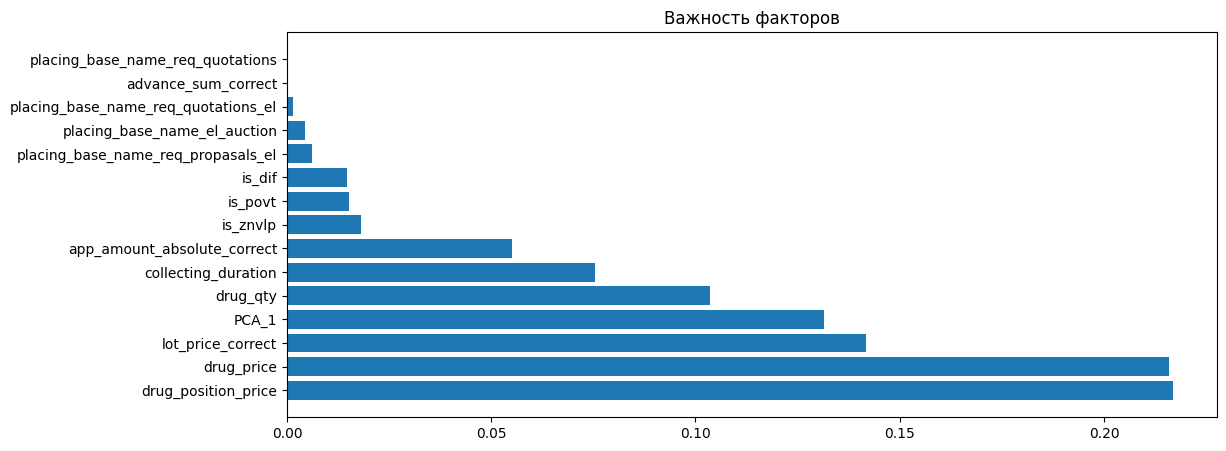

5 важных факторов: ['drug_position_price', 'drug_price', 'lot_price_correct', 'PCA_1', 'drug_qty']


In [40]:
# Создание "Дерево решений" и её обучение
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Получение важности факторов
importances = dt.feature_importances_

# Сохранение важности факторов в датафрейм и сортировка по убыванию
df_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances}).sort_values('importance', ascending=False)

# Построение графика важности факторов
plt.figure(figsize=(12,5))
plt.barh(df_importances['feature'], df_importances['importance'])
plt.title('Важность факторов')
plt.show()

# Вывод 5 наиболее важных факторов
top_factors = df_importances.head(5)['feature'].values.tolist()
print("5 важных факторов:", top_factors)

### Построение логистической регрессии

In [41]:
# Выбор только 5 наиболее важных факторов в обучающей и тестовой выборке
X_train = X_train[top_factors]
X_test = X_test[top_factors]

In [42]:
# Создание модели логистической регрессии и её обучение
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Предсказание на обучающей и тестовой выборках
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

# Оценка точности на обучающей и тестовой выборках
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Вывод точности модели на обучающей и тестовой выборках
print("Точность модели на обучающей выборке:", train_accuracy)
print("Точность модели на тестовой выборке:", test_accuracy)

Точность модели на обучающей выборке: 0.5055459544383346
Точность модели на тестовой выборке: 0.5083582089552239


Точность модели составляет близко к 0.5. Это равносильно случайному угадыванию. Точность модели является крайне низкой.